<a href="https://colab.research.google.com/github/larissafeitosa24/MVP_Projeto2_PUC_Rio_v2/blob/main/MVP_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de Regressão Logistica
Dados sobre clientes que acessam o aplicativo da seguradora X( por motivos de segurança e em respeito a lei LGPD para não divulgação dos dados da empresa e por uma questão interna gerencial não fui autorizada a divulgar o nome, mas é uma seguradora digital), e terminam a contratação do seguro.
Foram extraídos uma amostra de apenas 15 dias para teste desse modelo.

Atributos do dataset:

1. UserID - id
2. Gender - Genero
3. EstimatedSalary - Salario
4. Purchased - classificação, 0 e 1

Objetivo : é saber por meio dos dados informados qual a chance do possivel cliente terminar a contratação do seguro e testar a eficácia do app
A classificação está 0 - se não contratou e 1- se contratou

In [78]:
# Importar as  bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
url_dados = 'https://raw.githubusercontent.com/larissafeitosa24/MVP_Projeto2_PUC_Rio_v2/main/Social_Network_Ads.csv'

In [80]:
#Importar os dados
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [81]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [82]:
#Dividir em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

In [83]:
# Padronização - Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
# Importa a biblioteca e cria o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [85]:
# Preve os dados de teste
y_pred = classifier.predict(X_test)

In [86]:
#Cria a matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<ipython-input-87-b848d2016f13>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


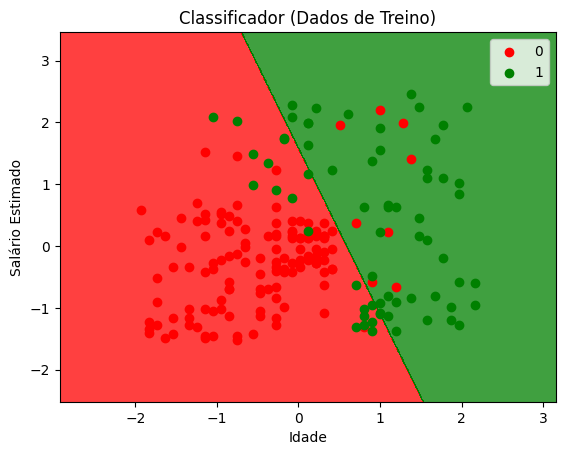

In [87]:
#Visualiza os dados de treino
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classificador (Dados de Treino)')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()

Divisão da regressão logistica na area de claissificação
Os pontos vermelhos é uma classificação correta, os verdes é uma classificação errada, pode-se perceber que quanto mais idoso e mais alto o salario mas existe chance de fechar a contratação.


<ipython-input-88-42f7294ebbb6>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


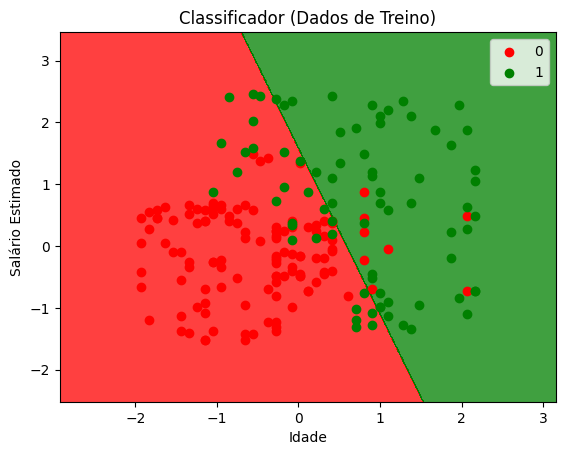

In [88]:
#Visualiza os dados de teste
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classificador (Dados de Treino)')
plt.xlabel('Idade')
plt.ylabel('Salário Estimado')
plt.legend()
plt.show()

Concluo que embora o numero de acertos tenha sido bom, acredito que novos atributos devam ser incluídos nesse modelo para melhorar a predição e classificação, pois os atributos informados nao são suficientes pra chegar às conclusões que gostaria que fosse testado.